In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

TODO
spróbować na surowym eeg
dodać do lstm attention
metryka F1 albo ballance accuracy

In [5]:
pip install biosppy

In [6]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

def create_labels(data, seq_length):
    labels = []
    for i in range(len(data) - seq_length):
        if 1 in data[i:i + seq_length]:
          labels.append(1)
        else:
          labels.append(0)
    return np.array(labels)


# Load data
1. forhead right
2. temple right (skroń)
3. middle (bad signal)
4. back (bad signal)
5. forhead left
6. temple left (skroń)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from biosppy.signals import eeg
sample_path = '/content/drive/MyDrive/doktorat/Badanie choroba symulatorowa/Testy_05_03_2024/'
sample_name = 'marek_05_03_2024_fourth.txt'
x=np.transpose(np.loadtxt(sample_path+sample_name)[:,5:11])


In [9]:
frequencies = [eeg.eeg(signal=i, sampling_rate=100., show=False) for i in x]

In [10]:
electrodes_dict = {0 : "czoło prawe",
                   1 : "skron prawa",
                   2 : "srodek",
                   3 : "tyl",
                   4 : "czolo lewe",
                   5 : "skron lewa"}

In [11]:
def show_plots(name, electrode=0):
  plt.figure(figsize=(30,3))
  plt.plot(frequencies[electrode][name])
  plt.title(name + "-" + electrodes_dict[electrode])


In [12]:
len(frequencies[0])

10

In [13]:
len(frequencies[0]["alpha_low"])

2260

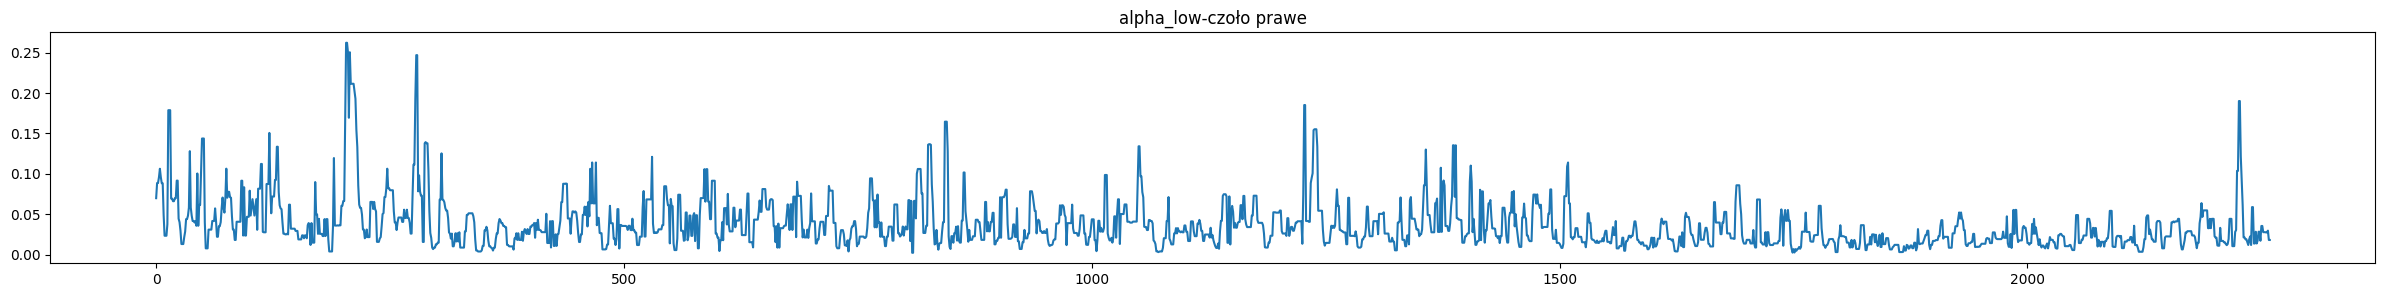

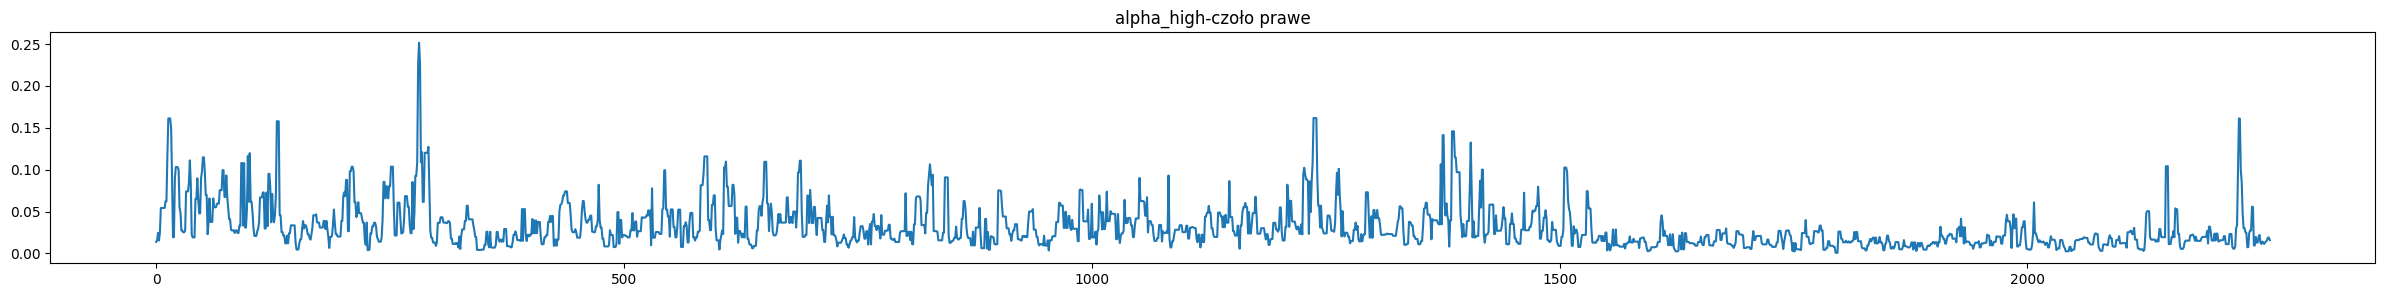

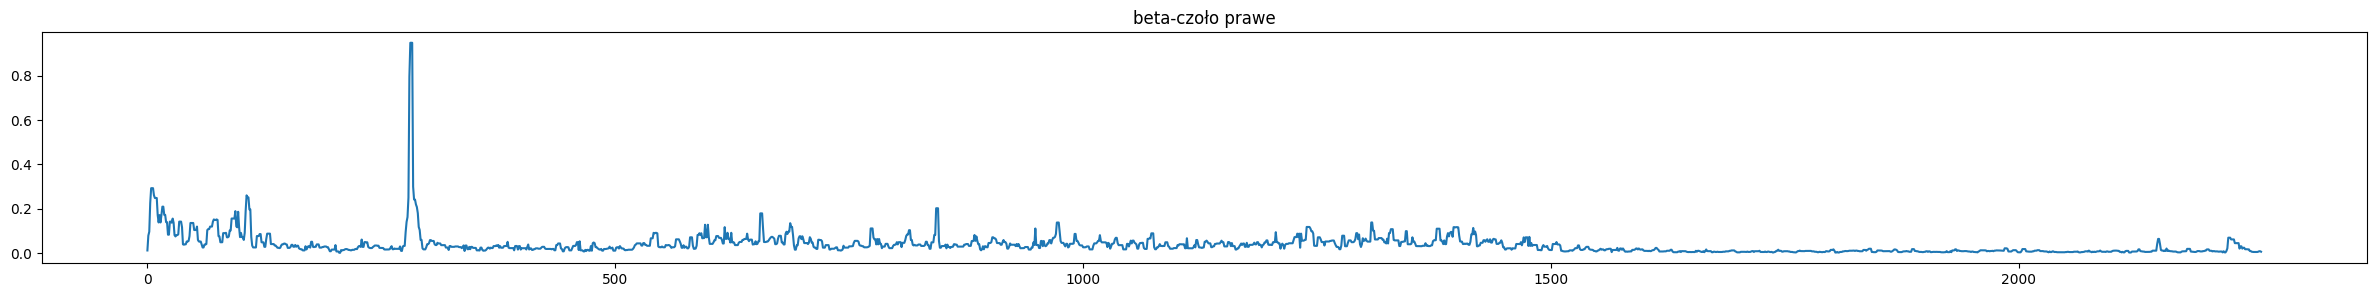

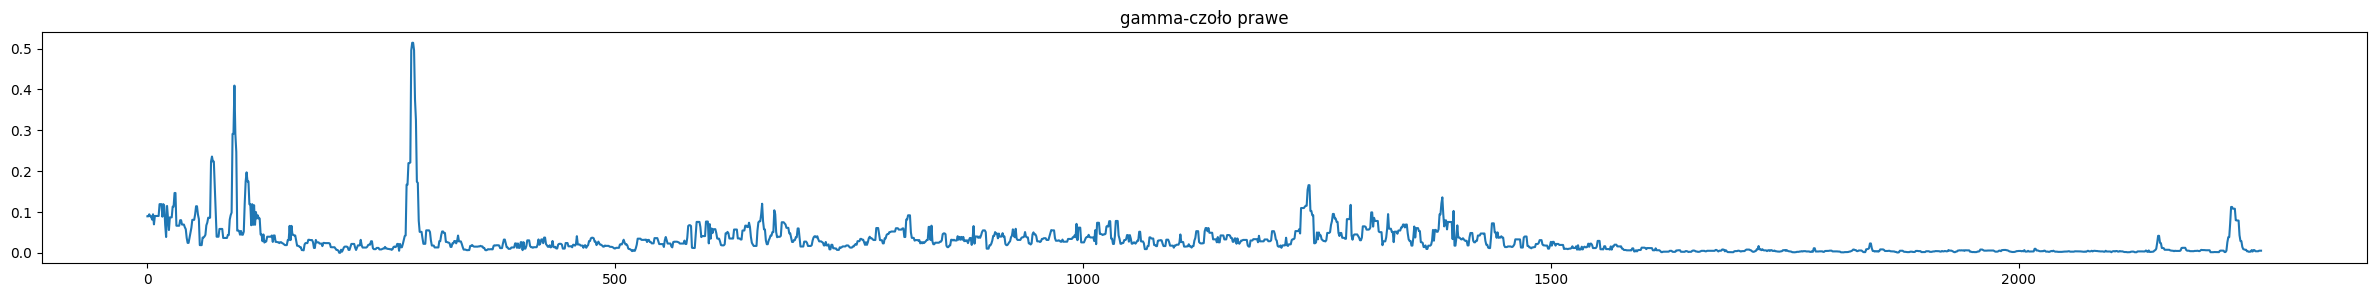

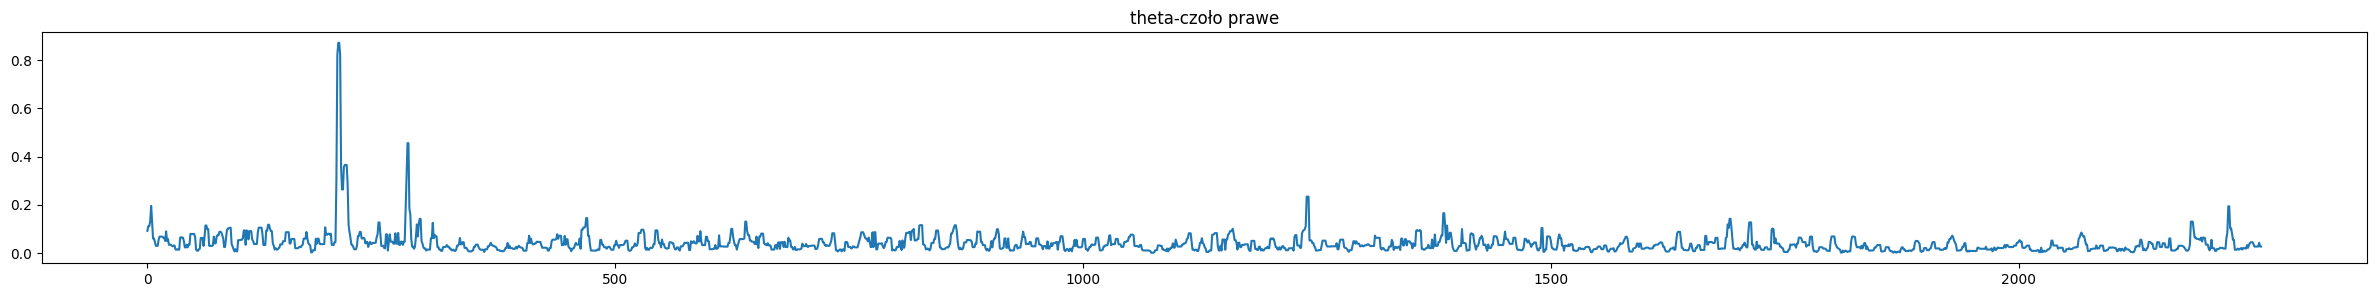

In [14]:
show_plots("alpha_low", 0)
show_plots("alpha_high", 0)
show_plots("beta", 0)
show_plots("gamma", 0)
show_plots("theta", 0)

## Prepare data

In [15]:
len(frequencies[0]["alpha_low"])

2260

In [16]:
y = [0] * 1440 + [1] * 820
y = y * 3

In [17]:
y = np.array(y)
y.shape

(6780,)

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [19]:
seq_length = 60

In [20]:
y = create_labels(y, seq_length)

In [21]:
y.shape

(6720,)

In [22]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
f_alpha_low = np.empty(0)
f_alpha_high = np.empty(0)
f_beta = np.empty(0)
f_gamma = np.empty(0)
f_theta = np.empty(0)

In [24]:
for i in [0]:
  f_alpha_low = np.append(f_alpha_low, frequencies[i]["alpha_low"])
  f_alpha_high = np.append(f_alpha_high, frequencies[i]["alpha_high"])
  f_beta = np.append(f_beta, frequencies[i]["beta"])
  f_gamma = np.append(f_gamma, frequencies[i]["gamma"])
  f_theta = np.append(f_theta, frequencies[i]["theta"])

for i in [4,5]:
  f_alpha_low = np.append(f_alpha_low, frequencies[i]["alpha_low"] * 100)
  f_alpha_high = np.append(f_alpha_high, frequencies[i]["alpha_high"] * 100)
  f_beta = np.append(f_beta, frequencies[i]["beta"] * 100)
  f_gamma = np.append(f_gamma, frequencies[i]["gamma"] * 100)
  f_theta = np.append(f_theta, frequencies[i]["theta"] * 100)


In [25]:
f_alpha_low.shape

(6780,)

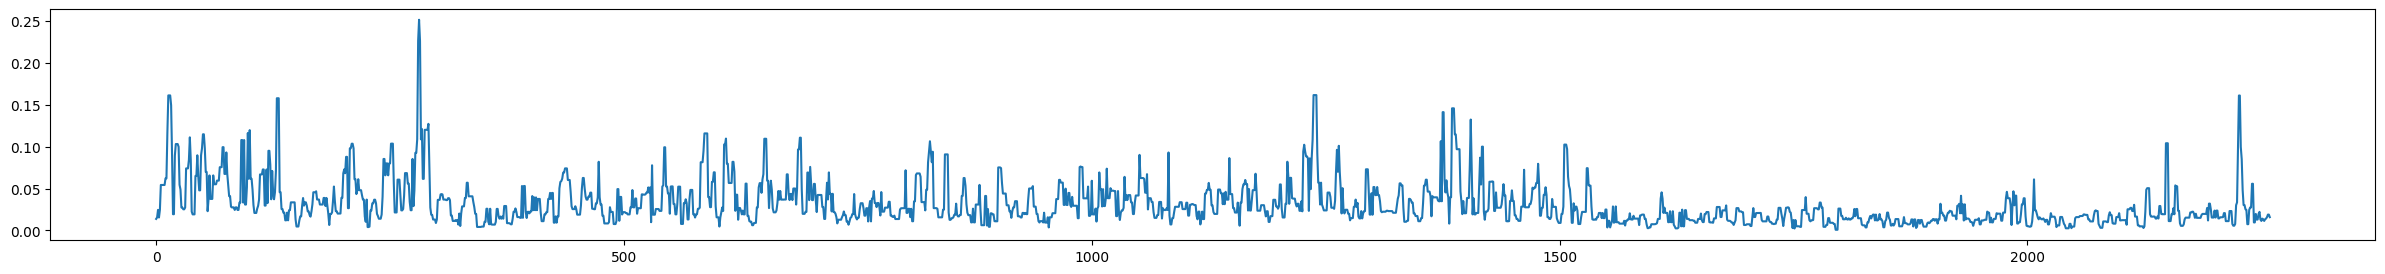

In [26]:
plt.figure(figsize=(30,3))
plt.plot(frequencies[0]["alpha_high"])

In [27]:
f_alpha_low[f_alpha_low > 0.25] = 0

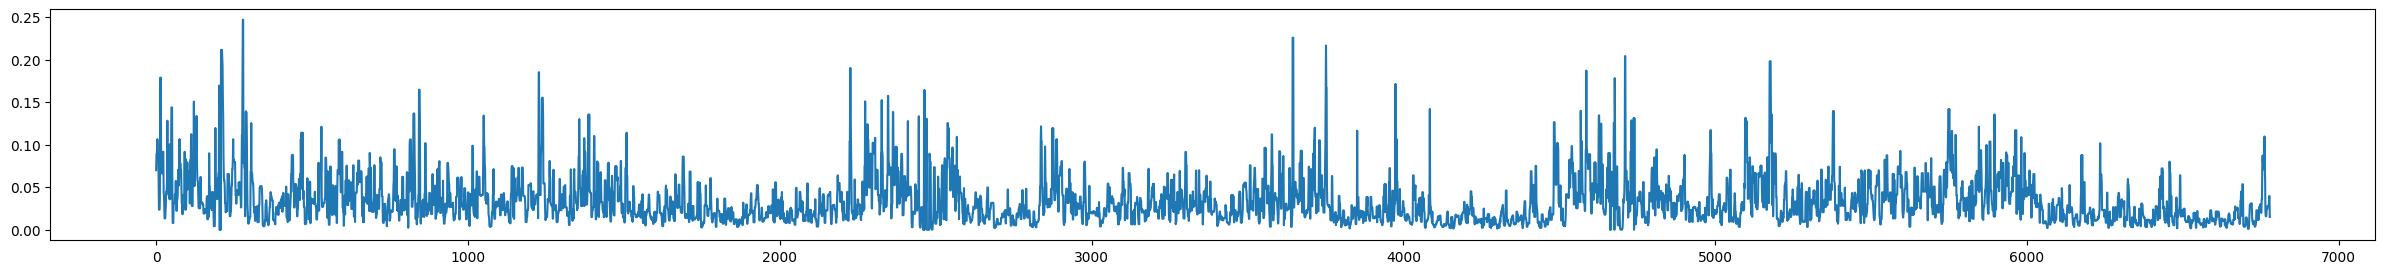

In [28]:
plt.figure(figsize=(30,3))
plt.plot(f_alpha_low)

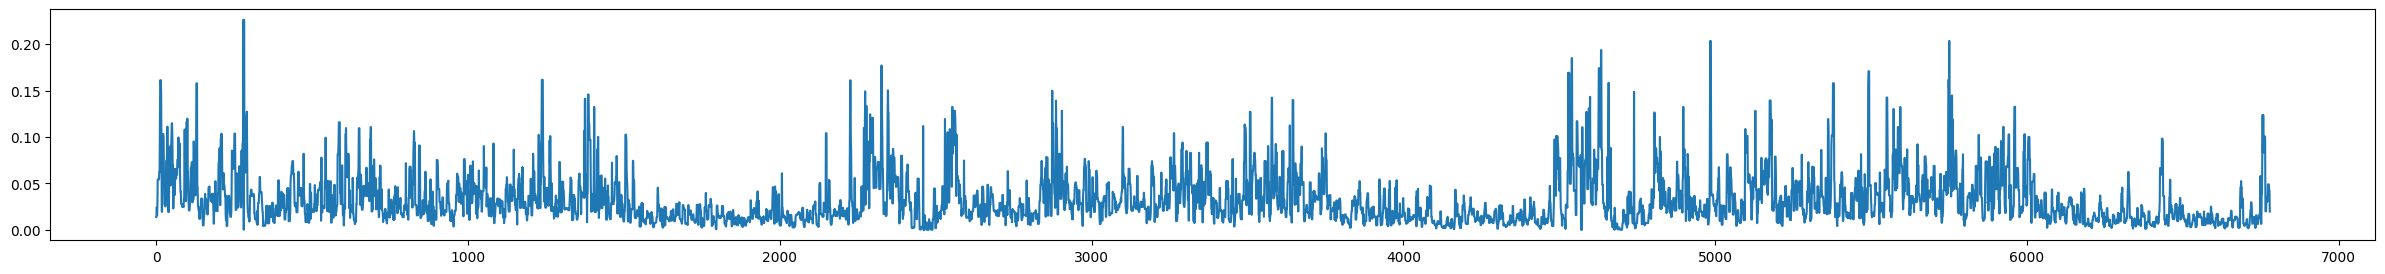

In [29]:
f_alpha_high[f_alpha_high > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_alpha_high)

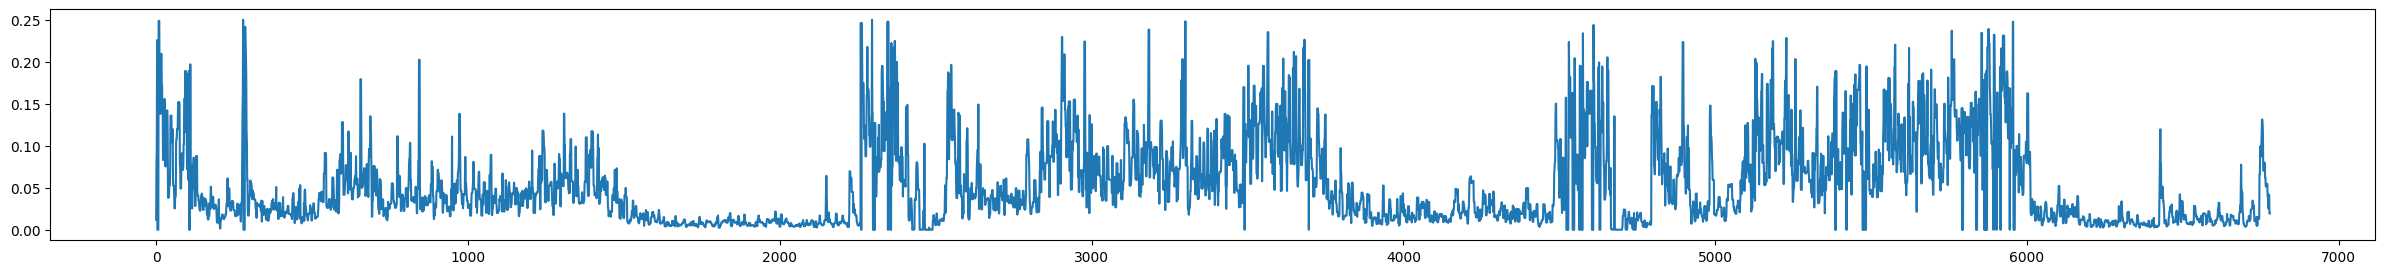

In [30]:
f_beta[f_beta > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_beta)

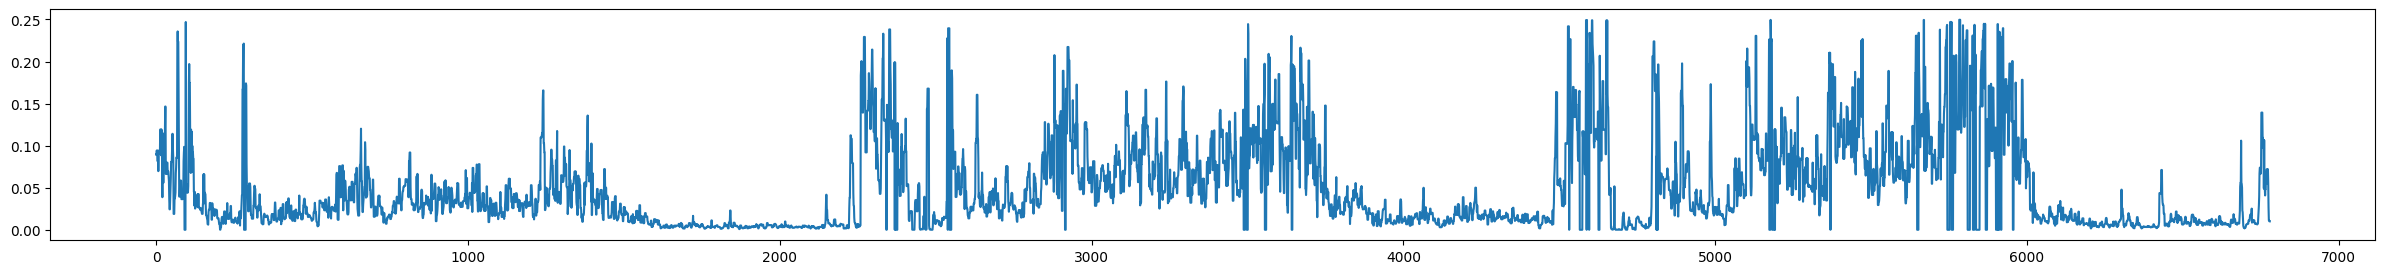

In [31]:
f_gamma[f_gamma > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_gamma)

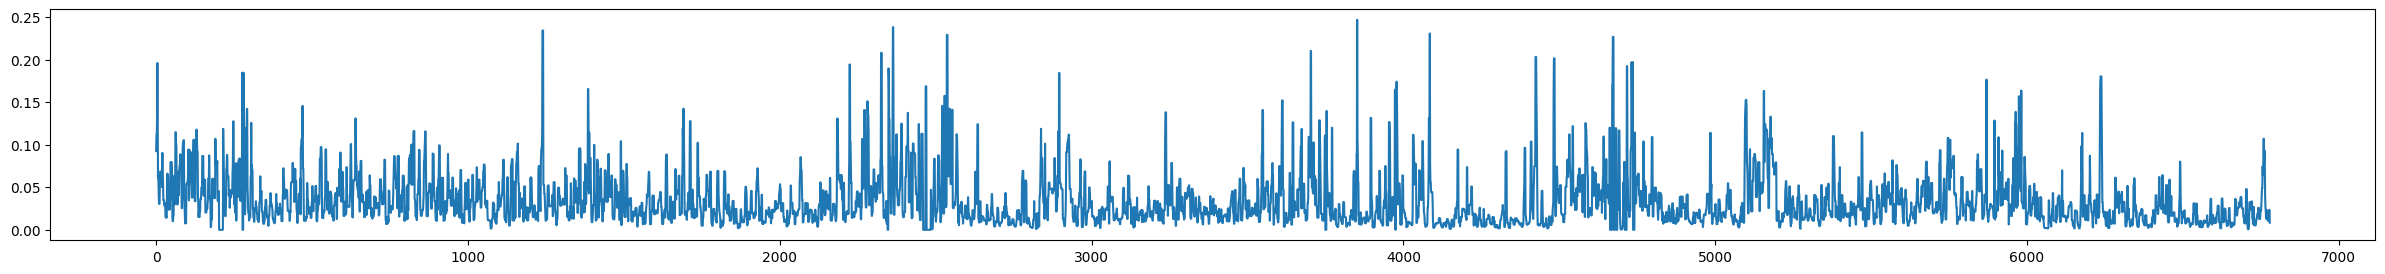

In [32]:
f_theta[f_theta > 0.25] = 0
plt.figure(figsize=(30,3))
plt.plot(f_theta)

In [33]:
data = np.array([create_sequences(f_alpha_low, seq_length),
                create_sequences(f_alpha_high, seq_length),
                create_sequences(f_beta, seq_length),
                create_sequences(f_gamma, seq_length),
                create_sequences(f_theta, seq_length)])

In [34]:
data.shape

(5, 6720, 60)

In [35]:
data[0][0]

array([0.07000401, 0.08874191, 0.08874191, 0.09589168, 0.10635378,
       0.09589168, 0.08843325, 0.08843325, 0.04927426, 0.02359997,
       0.02359997, 0.02359997, 0.03782293, 0.17874545, 0.17874545,
       0.17874545, 0.06950769, 0.06950769, 0.0662858 , 0.0662858 ,
       0.06992851, 0.06992851, 0.09171072, 0.09171072, 0.0446685 ,
       0.04026779, 0.02980106, 0.01334197, 0.01334197, 0.01334197,
       0.02187538, 0.02871899, 0.04416669, 0.04416669, 0.04833249,
       0.05838831, 0.1281012 , 0.05838831, 0.04833249, 0.04181217,
       0.04181217, 0.04002788, 0.04181217, 0.03592681, 0.10052811,
       0.03592681, 0.06163014, 0.06163014, 0.10192183, 0.14374096,
       0.14374096, 0.14374096, 0.04026195, 0.00800431, 0.00800431,
       0.00800431, 0.03115945, 0.03115945, 0.03115945, 0.03115945])

In [36]:
import random
permutation = np.random.permutation(data.shape[1])
max(permutation)

6719

In [37]:
# Apply the permutation to both arrays
data = data[:, permutation]
y = y[permutation]

In [38]:
data.shape

(5, 6720, 60)

In [39]:
train_data = data[:,0:5000]
test_data = data[:,5000:6720]
train_y = y[0:5000]
test_y = y[5000:6720]

In [40]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(5, 5000, 60)
(5, 1720, 60)
(5000,)
(1720,)


# LSTM architecture
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9137130

# Multiple input

In [41]:
pip install tensorflow tensorflow-addons

In [42]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [43]:
# Define input layers
input_alpha_low = Input(shape=(seq_length, 1), name='eeg_alpha_low')
input_alpha_high = Input(shape=(seq_length, 1), name='eeg_alpha_high')
input_beta = Input(shape=(seq_length, 1), name='eeg_beta')
input_theta = Input(shape=(seq_length, 1), name='eeg_theta')
# input_delta = Input(shape=(seq_length, 1), name='eeg_delta')
input_gamma = Input(shape=(seq_length, 1), name='eeg_gamma')
# input_ecg = Input(shape=(seq_length, 1), name='ecg')

lstm0 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_alpha_low)
lstm1 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_alpha_high)
lstm2 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_beta)
lstm3 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_theta)
lstm4 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_gamma)
# lstm5 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input_ecg)

lstm0_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm0)
lstm1_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm1)
lstm2_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm2)
lstm3_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm3)
lstm4_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm4)
# lstm5_2 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm5)


combined = Concatenate()([lstm0_2, lstm1_2, lstm2_2, lstm3_2, lstm4_2])

# Define the final output layer
dense = Dense(32, activation="relu")(combined)
dense2 = Dense(32, activation="relu")(dense)
dense3 = Dense(32, activation="relu")(dense2)
output = Dense(1, activation='sigmoid')(dense)  # binary classification output

# Create the model
model = Model(inputs=[input_alpha_low, input_alpha_high, input_beta, input_theta, input_gamma], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

In [44]:
# Train the model
history = model.fit(x=[train_data[0], train_data[1], train_data[2], train_data[3], train_data[4]], y=train_y, epochs=10, batch_size=32, validation_data=([test_data[0], test_data[1], test_data[2], test_data[3], test_data[4]], test_y))

Epoch 1/10
157/157 [==============================] - 84s 261ms/step - loss: 0.4367 - accuracy: 0.8152 - f1_score: 0.7281 - val_loss: 0.3846 - val_accuracy: 0.8448 - val_f1_score: 0.7806
Epoch 2/10
157/157 [==============================] - 36s 230ms/step - loss: 0.3516 - accuracy: 0.8652 - f1_score: 0.8123 - val_loss: 0.4016 - val_accuracy: 0.8500 - val_f1_score: 0.8009
Epoch 3/10
157/157 [==============================] - 35s 225ms/step - loss: 0.3264 - accuracy: 0.8746 - f1_score: 0.8258 - val_loss: 0.3590 - val_accuracy: 0.8500 - val_f1_score: 0.8012
Epoch 4/10
157/157 [==============================] - 36s 228ms/step - loss: 0.3077 - accuracy: 0.8818 - f1_score: 0.8347 - val_loss: 0.3236 - val_accuracy: 0.8634 - val_f1_score: 0.8130
Epoch 5/10
157/157 [==============================] - 33s 208ms/step - loss: 0.2930 - accuracy: 0.8860 - f1_score: 0.8385 - val_loss: 0.3139 - val_accuracy: 0.8901 - val_f1_score: 0.8410
Epoch 6/10
157/157 [==============================] - 33s 208ms/s

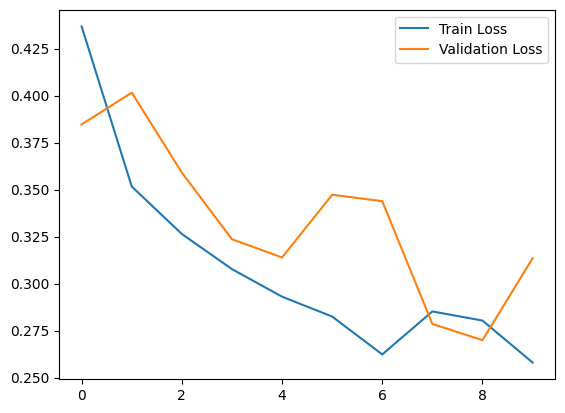

In [45]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [46]:
predicted = model.predict([test_data[0], test_data[1], test_data[2], test_data[3], test_data[4]])

54/54 [==============================] - 7s 43ms/step


In [47]:
test_y

array([0, 0, 0, ..., 1, 0, 1])

In [48]:
p = np.where(predicted > 0.5, 1, 0).flatten()
p

array([0, 0, 0, ..., 1, 0, 1])

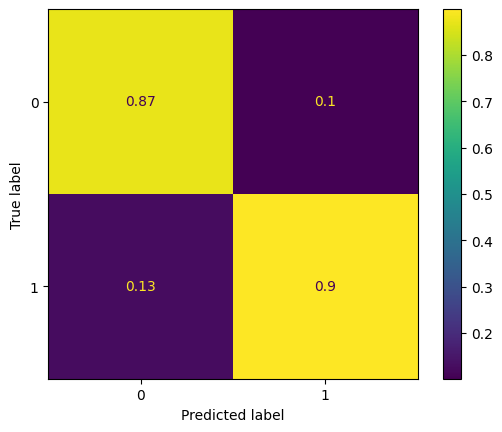

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

result = confusion_matrix(test_y, p , normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result)
disp.plot()

# Single input signal

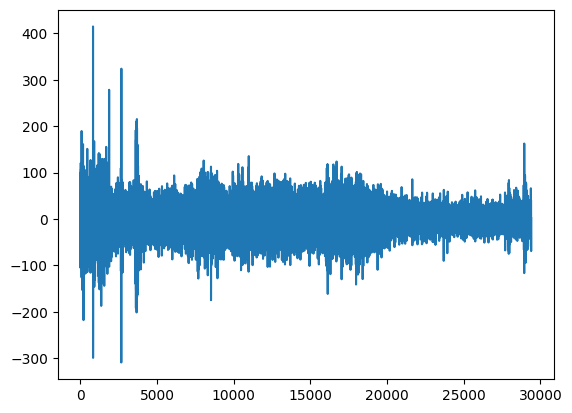

In [50]:
plt.plot(frequencies[0]["filtered"])

In [51]:
frequencies[0]["filtered"].shape

(29400, 1)

In [52]:
f_filtered = np.empty(0)

for i in [0]:
  f_filtered = np.append(f_filtered, frequencies[i]["filtered"])

for i in [4,5]:
  f_filtered = np.append(f_filtered, frequencies[i]["filtered"]* 10)



In [53]:
f_filtered.shape

(88200,)

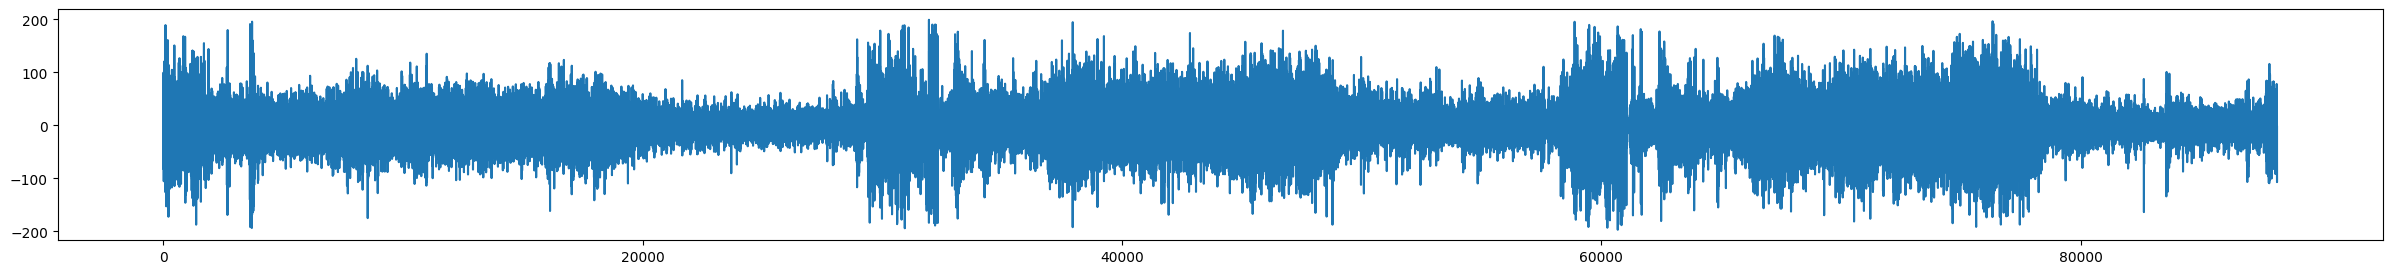

In [54]:
f_filtered[f_filtered > 200] = 0
f_filtered[f_filtered < -200] = 0
plt.figure(figsize=(30,3))
plt.plot(f_filtered)

In [55]:
data_filtered = create_sequences(f_filtered, seq_length)

In [56]:
data_filtered.shape

(88140, 60)

In [57]:
y = [0] * 18700 + [1] * 10700
y = y * 3
y = np.array(y)
y.shape

(88200,)

In [58]:
y = create_labels(y, seq_length)

In [59]:
y.shape

(88140,)

In [60]:
permutation = np.random.permutation(data_filtered.shape[0])
max(permutation)


88139

In [61]:
# Apply the permutation to both arrays
data_filtered = data_filtered[permutation]
y = y[permutation]

In [62]:
# Define input layer
input = Input(shape=(seq_length, 1), name='eeg_alpha_low')

lstm0 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (input)
lstm1 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (lstm0)
lstm2 = LSTM(units=32, return_sequences=True, input_shape=(seq_length, 1)) (lstm1)
lstm3 = LSTM(units=32, input_shape=(seq_length, 1)) (lstm2)

# Define the final output layer
dense = Dense(32, activation="sigmoid")(lstm3)
dense2 = Dense(32, activation="sigmoid")(dense)
dense3 = Dense(32, activation="sigmoid")(dense2)
output = Dense(1, activation='sigmoid')(dense)  # binary classification output

# Create the model
model2 = Model(inputs=input, outputs=output)

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(num_classes=1, threshold=0.5)])

In [63]:
train_data = data_filtered[0:70000]
test_data = data_filtered[70000:88140]
train_y = y[0:70000]
test_y = y[70000:88140]

In [64]:
print(train_data.shape)
print(test_data.shape)
print(train_y.shape)
print(test_y.shape)

(70000, 60)
(18140, 60)
(70000,)
(18140,)


In [65]:
history = model2.fit(x=train_data, y=train_y, epochs=10, batch_size=32, validation_data=(test_data, test_y))

Epoch 1/10
2188/2188 [==============================] - 256s 113ms/step - loss: 0.3726 - accuracy: 0.8464 - f1_score: 0.7747 - val_loss: 0.3341 - val_accuracy: 0.8657 - val_f1_score: 0.8154
Epoch 2/10
2188/2188 [==============================] - 248s 113ms/step - loss: 0.3109 - accuracy: 0.8762 - f1_score: 0.8216 - val_loss: 0.2676 - val_accuracy: 0.9006 - val_f1_score: 0.8539
Epoch 3/10
2188/2188 [==============================] - 258s 118ms/step - loss: 0.2257 - accuracy: 0.9127 - f1_score: 0.8767 - val_loss: 0.1722 - val_accuracy: 0.9346 - val_f1_score: 0.9104
Epoch 4/10
2188/2188 [==============================] - 248s 113ms/step - loss: 0.1291 - accuracy: 0.9523 - f1_score: 0.9342 - val_loss: 0.0757 - val_accuracy: 0.9741 - val_f1_score: 0.9644
Epoch 5/10
2188/2188 [==============================] - 260s 119ms/step - loss: 0.0704 - accuracy: 0.9762 - f1_score: 0.9673 - val_loss: 0.0542 - val_accuracy: 0.9821 - val_f1_score: 0.9758
Epoch 6/10
2188/2188 [============================

In [66]:
predicted = model2.predict(test_data)

567/567 [==============================] - 17s 28ms/step


In [67]:
p = np.where(predicted > 0.5, 1, 0).flatten()
p

array([0, 0, 0, ..., 0, 1, 1])

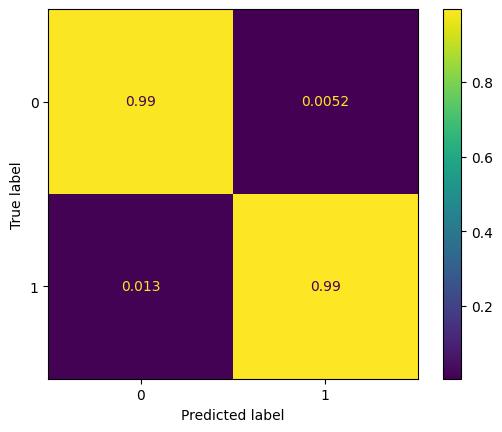

In [68]:
result = confusion_matrix(test_y, p , normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=result)
disp.plot()